In [ ]:
 from sklearn.datasets import load_digits
 digits = load_digits()
 print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

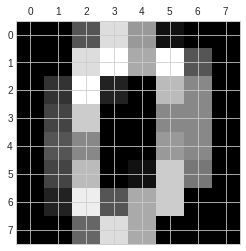

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

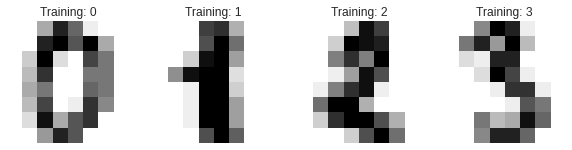

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
n_samples = len(digits.images)
print(n_samples)

1797


In [ ]:
data = digits.data
data.shape

(1797, 64)

In [ ]:
#Import required modules
from sklearn.decomposition import PCA
 
pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(digits.data)
 
converted_data.shape

(1797, 2)

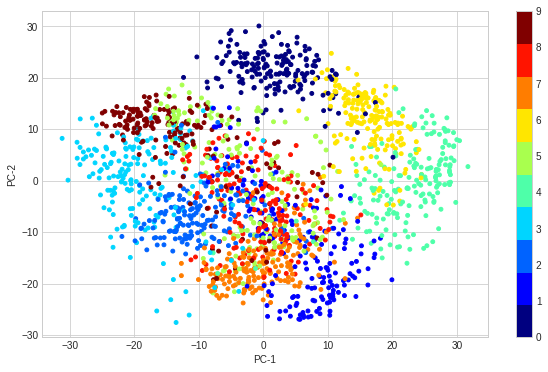

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
print(data.shape)

(1797, 64)


In [ ]:
print(predicted.shape)

(899,)


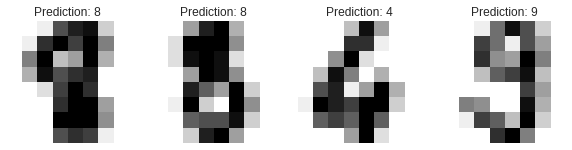

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(898, 1)
(899, 1)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[60  0  0  0  4  0 18  6  0  0]
 [ 8  0  3  1  1  0  1 77  0  0]
 [ 0  0 75  4  0  0  0  7  0  0]
 [ 0  0 71  4  0  0  0 16  0  0]
 [ 6  0  0  0 73  0  9  4  0  0]
 [ 9  0  1  4  0  0  0 77  0  0]
 [28  0  0  0  3  0 57  3  0  0]
 [13  0  1  0  0  0  0 75  0  0]
 [ 4  0  2  4  0  0  0 78  0  0]
 [ 0  0  4  7  0  0  0 80  0  1]]
Accuracy0.38375973303670746


In [ ]:
print(y_pred.shape)
print(X_test.shape)

(899,)
(899, 1)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, digits.target, test_size=0.5, shuffle=False
)

In [ ]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[80  0  0  1  3  0  4  0  0  0]
 [ 0 35  0 13 11  8 20  1  0  3]
 [ 0  0  7 33  0 18 10 18  0  0]
 [ 0  0  0 58  0  3  2 20  0  8]
 [ 1  0  0  0 71  7  7  6  0  0]
 [17  1  0  1  0 58  8  0  0  6]
 [ 0  3  0  3  1  0 78  6  0  0]
 [ 0  0  0  0  0 11  0 78  0  0]
 [ 0  5  0 34  5 30  8  6  0  0]
 [ 5  0  0 17  0  3  3  9  0 55]]
Accuracy0.578420467185762
